In [9]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import queue as Queue
import time
import sys
import copy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from numpy import ones
from scipy import signal
from scipy import integrate
import threading

from numpy import mean
from numpy import power
from numpy.fft import fft
from numpy.fft import fftshift
from numpy.fft import ifft
from numpy.fft import ifftshift
import bitarray
from  scipy.io.wavfile import read as wavread
#import newax25 as ax25

import multiprocessing

import sounddevice as sd
#import RPi.GPIO as GPIO
from functools import reduce
from numpy import ones,zeros, pi, cos, exp, sign
from queue import *

import numpy.ctypeslib as npct
from ctypes import c_int
from ctypes import c_float

import scipy
import zlib
#from trans_utils import *
#from proc_funs import *
from IPython.display import Image

%matplotlib inline

In [3]:
def grayscale_proc(shape):
    # shape is a tuple in row-column order
    
    def for_proc_fun(img_path):
        marconi_im = scipy.ndimage.imread(img_path, mode='L')
        marc_vec = np.ndarray.flatten(marconi_im)
        return np.ndarray.tobytes(marc_vec)
    
    def rev_proc_fun (rec_img_path, img_bytes):
        rec_vec = np.frombuffer(img_bytes, dtype=np.uint8)
        rows, cols = shape
        rec_mtx = np.reshape(rec_vec, [rows, cols])
        scipy.misc.imsave(rec_img_path, rec_mtx)
    
    return (for_proc_fun, rev_proc_fun)

### forward processing

In [4]:
f_name = 'Marconi.tiff'
marconi_im = scipy.ndimage.imread(f_name, mode='L')
rows, cols = np.shape(marconi_im)
marc_vec = np.ndarray.flatten(marconi_im)
marc_bytes = np.ndarray.tobytes(marc_vec)


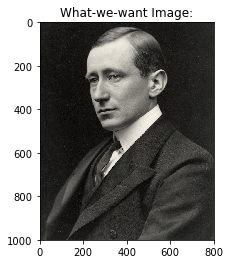

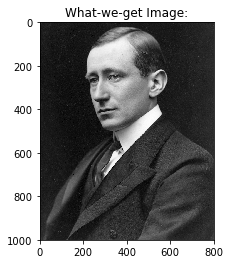

In [5]:

I = plt.imread(f_name)
plt.imshow(I)
plt.title('What-we-want Image:')
plt.figure()
plt.imshow(marconi_im, cmap = 'gray')
plt.title('What-we-get Image:')


### reverse processing

NameError: name 'EE123_psnr' is not defined

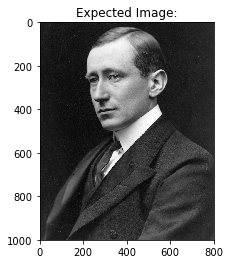

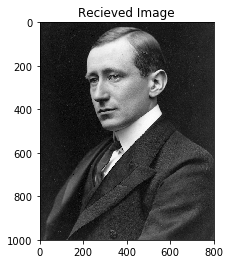

In [6]:
rec_vec = np.frombuffer(marc_bytes, dtype=np.uint8)
marconi_im_post = np.reshape(rec_vec, [rows, cols])


plt.figure()
plt.imshow(marconi_im, cmap = 'gray')
plt.title('Expected Image:')
plt.figure()
plt.imshow(marconi_im_post, cmap = 'gray')
plt.title('Recieved Image')

PSNR = EE123_psnr(marconi_im, marconi_im_post)
print("PSNR: ", PSNR)

### Final Test

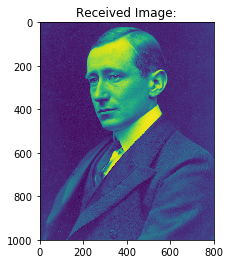

In [7]:
gray_in, gray_out = grayscale_proc((rows, cols))
b_in = gray_in('Marconi.tiff')
gray_out('Marconi_rec.tiff', b_in)

I2 = plt.imread('Marconi_rec.tiff')
plt.imshow(I2)
plt.title('Received Image:')

In [10]:
def for_proc_fun(img_path):
        with open(img_path, 'rb') as f:
            img_bytes = f.read()
        return img_bytes
    
def rev_proc_fun (rec_img_path, img_bytes):
    with open(rec_img_path, 'wb') as f:
        f.write(img_bytes)

In [14]:
test_im = 'pauly.tiff'
comp_val = 1
bytes_to_comp = for_proc_fun(test_im)
bytes_comp = zlib.compress(bytes_to_comp, comp_val)
print('Compressed by: ', (len(bytes_to_comp) - len(bytes_comp)) / len(bytes_to_comp))

Compressed by:  0.9664137941770142


### Testing for_proc and rev_proc for color

In [50]:
def channels_to_bytes(channels):
    byte_list = []
    shapes = []
    for channel in channels:
        curr_shape = channel.shape
        shapes.append(curr_shape)
        flattened_channel = np.reshape(channel, (curr_shape[0]*curr_shape[1]))
        curr_bytes = flattened_channel.tobytes()
        byte_list.append(curr_bytes)
    all_bytes = b''.join(byte_list)
    return (all_bytes, shapes)

def bytes_to_channels(bytes_str, shapes):
    flattend_channels = np.frombuffer(bytes_str, dtype = np.uint8)
    channels = []
    chn_idx = 0
    for shape in shapes:
        chn_end = chn_idx + shape[0]*shape[1]
        flat_chn = flattend_channels[chn_idx:chn_end]
        channel = np.reshape(flat_chn, shape)
        channels.append(channel)
        chn_idx = chn_end
    return channels

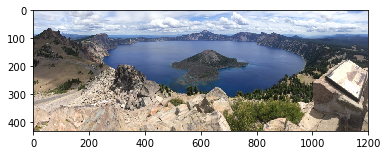

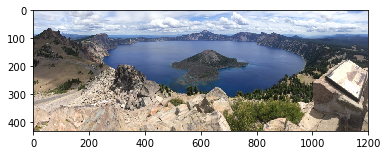

In [51]:
test_im_f_name = 'createrLake.tiff'
test_img = scipy.ndimage.imread(test_im_f_name)
plt.figure()
plt.imshow(test_img)
channels = [test_img[:,:,0], test_img[:,:,1], test_img[:,:,2]]

byte_str, shapes = channels_to_bytes(channels)

rec_channels = bytes_to_channels(byte_str, shapes)
rec_img = np.stack(rec_channels, axis=2)
plt.figure()
plt.imshow(rec_img)